In [1]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import gensim
from gensim.models import word2vec
from gensim.models import Word2Vec
from embeddings import Embeddings
from nltk.tokenize import word_tokenize
from changepy import pelt
from changepy.costs import normal_mean
%matplotlib inline

In [2]:
# embedding = Embeddings(100, 3, 1, 4)

In [3]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format("../data/GoogleNews-vectors-negative300.bin", binary=True)

In [100]:
context = """The sun sets in the west. The sun rises in the east. If Roman numerals were used they would have destroyed Abdul Kalam."""

In [101]:
questions = ["Which NFL team represented the AFC at Super Bowl 50?",
"Which NFL team represented the NFC at Super Bowl 50?",
"Where did Super Bowl 50 take place?",
"Which NFL team won Super Bowl 50?",
"What color was used to emphasize the 50th anniversary of the Super Bowl?",
"What was the theme of Super Bowl 50?",
"What day was the game played on?",
"What is the AFC short for?",
"What was the theme of Super Bowl 50?",
"What does AFC stand for?",
"What day was the Super Bowl played on?",
"Who won Super Bowl 50?",
"What venue did Super Bowl 50 take place in?",
"What city did Super Bowl 50 take place in?",
"If Roman numerals were used, what would Super Bowl 50 have been called?",
"Super Bowl 50 decided the NFL champion for what season?",
"What year did the Denver Broncos secure a Super Bowl title for the third time?",
"What city did Super Bowl 50 take place in?",
"What stadium did Super Bowl 50 take place in?",
"What was the final score of Super Bowl 50?",
"What month, day and year did Super Bowl 50 take place?",
"What year was Super Bowl 50?",
"What team was the AFC champion?",
"What team was the NFC champion?",
"Who won Super Bowl 50?",
"Super Bowl 50 determined the NFL champion for what season?",
"Which team won Super Bowl 50.",
"Where was Super Bowl 50 held?",
"The name of the NFL championship game is?",
"What 2015 NFL team one the AFC playoff?"]

In [102]:
question = "Where does the sun rise"

In [103]:
tokenized_context = [word for word in word_tokenize(context.lower()) if word in word2vec_model.vocab]
tokenized_question = [word for word in word_tokenize(question.lower()) if word in word2vec_model.vocab]

In [104]:
len(tokenized_context)

23

In [105]:
len(tokenized_question)

5

In [106]:
question_context_similarity = np.zeros((len(tokenized_question), len(tokenized_context)))

In [107]:
for context_index, context_word in enumerate(tokenized_context):
    for question_index, question_word in enumerate(tokenized_question):
        question_context_similarity[question_index][context_index] = word2vec_model.similarity(question_word, context_word)

In [108]:
question_context_similarity

array([[ 0.33894969,  0.14939619,  0.03897604,  0.56624353,  0.33894969,
         0.35721807,  0.33894969,  0.14939619,  0.07876396,  0.56624353,
         0.33894969,  0.35421662,  0.4568369 ,  0.05862254, -0.01209078,
         0.13866396,  0.17126685,  0.38241488,  0.19520967,  0.32818559,
         0.13606084, -0.08291342,  0.01398347],
       [ 0.22534474,  0.06303354,  0.17775049,  0.09361951,  0.22534474,
        -0.00604059,  0.22534474,  0.06303354,  0.2191661 ,  0.09361951,
         0.22534474,  0.00263982,  0.40305528,  0.02579775,  0.04759801,
        -0.07671561,  0.23233675,  0.24820227,  0.54530906,  0.06643999,
         0.00968716,  0.05682599, -0.00587688],
       [ 1.        ,  0.12125856,  0.22441499,  0.54292963,  1.        ,
         0.19303074,  1.        ,  0.12125856,  0.18032652,  0.54292963,
         1.        ,  0.18160978,  0.27620077,  0.08889061,  0.06054101,
         0.2811602 ,  0.19996042,  0.40384981,  0.337817  ,  0.34144443,
         0.1058423 , -0.0969

In [109]:
row_wise_sum = np.sum(question_context_similarity, axis=1)

In [110]:
normalised_question_context_matrix = np.array([question_context_similarity[index] / row_wise_sum[index]  for index in range(question_context_similarity.shape[0])])

In [111]:
trace = go.Heatmap(z=normalised_question_context_matrix, x=tokenized_context, y=tokenized_question)
data = [trace]
py.iplot(data)

In [112]:
tokenized_context

['the',
 'sun',
 'sets',
 'in',
 'the',
 'west',
 'the',
 'sun',
 'rises',
 'in',
 'the',
 'east',
 'if',
 'roman',
 'numerals',
 'were',
 'used',
 'they',
 'would',
 'have',
 'destroyed',
 'abdul',
 'kalam']

In [113]:
predicted_signal_using_max = np.max(normalised_question_context_matrix, axis=0)

In [114]:
predicted_signal_using_median = np.sum(normalised_question_context_matrix, axis=0)

([<matplotlib.axis.XTick at 0x7f40ec5e5278>,
 <a list of 23 Text xticklabel objects>)

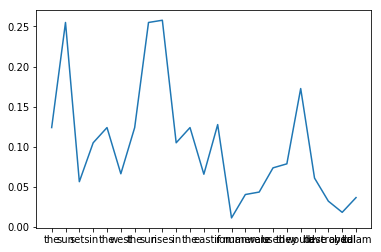

In [115]:
plt.plot(predicted_signal_using_max)
plt.xticks(np.arange(len(tokenized_context)),tokenized_context)

In [116]:
trace = go.Heatmap(
    z=[predicted_signal_using_max],
    x=tokenized_context
)
data = [trace]
py.iplot(data)

In [117]:
trace = go.Heatmap(
    z=[predicted_signal_using_median],
    x=tokenized_context
)
data = [trace]
py.iplot(data)

In [118]:
pelt(normal_mean(predicted_signal_using_median, np.var(predicted_signal_using_median)), len(predicted_signal_using_median))

[0, 21]

In [119]:
np.mean(predicted_signal_using_median[82:])

/home/nishant/venvs/autofill/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning:

Mean of empty slice.

/home/nishant/venvs/autofill/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



nan

In [120]:
tokenized_context[:7]

['the', 'sun', 'sets', 'in', 'the', 'west', 'the']